In [2]:
## No elimine esta celda, ya que permite actualizar los archivos .py
## sin tener que reiniciar el Kernel de Jupyter.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import timm

len(timm.list_models())

timm.list_models("efficientnet*")

/home/notvenja24/Descargas/Deep Learning/Tarea03_Deep_learning/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['efficientnet_b0',
 'efficientnet_b0_g8_gn',
 'efficientnet_b0_g16_evos',
 'efficientnet_b0_gn',
 'efficientnet_b1',
 'efficientnet_b1_pruned',
 'efficientnet_b2',
 'efficientnet_b2_pruned',
 'efficientnet_b3',
 'efficientnet_b3_g8_gn',
 'efficientnet_b3_gn',
 'efficientnet_b3_pruned',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_b8',
 'efficientnet_blur_b0',
 'efficientnet_cc_b0_4e',
 'efficientnet_cc_b0_8e',
 'efficientnet_cc_b1_8e',
 'efficientnet_el',
 'efficientnet_el_pruned',
 'efficientnet_em',
 'efficientnet_es',
 'efficientnet_es_pruned',
 'efficientnet_h_b5',
 'efficientnet_l2',
 'efficientnet_lite0',
 'efficientnet_lite1',
 'efficientnet_lite2',
 'efficientnet_lite3',
 'efficientnet_lite4',
 'efficientnet_x_b3',
 'efficientnet_x_b5',
 'efficientnetv2_l',
 'efficientnetv2_m',
 'efficientnetv2_rw_m',
 'efficientnetv2_rw_s',
 'efficientnetv2_rw_t',
 'efficientnetv2_s',
 'efficientnetv2_xl']

In [10]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchmetrics
import time
from torchinfo import summary

class Transforms:
    def __init__(self, transform: transforms.Compose):
        self.transform = transform

    def __call__(self, image):
        if not isinstance(image, Image.Image):  # Verifica que sea una instancia de PIL.Image
            raise TypeError("La entrada debe ser una imagen PIL.")
        return self.transform(image)


# Transformaciones para el conjunto de entrenamiento
train_transforms = transforms.Compose([
    transforms.Resize((256, 256)),  # Redimensiona la imagen
    transforms.ToTensor(),  # Convierte la imagen a un tensor (normaliza a rango [0, 1])
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),  # Normalización estándar
])

# Transformaciones para el conjunto de validación
validation_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

In [11]:
train_data = ImageFolder(
    "house_plant_species/train",
    transform=Transforms(train_transforms),
)
validation_data = ImageFolder(
    "house_plant_species/validation",
    transform=Transforms(validation_transforms),
)

print(f"Elementos en Entrenamiento: {len(train_data)}")
print(f"Elementos en Validación: {len(validation_data)}")

Elementos en Entrenamiento: 10835
Elementos en Validación: 2736


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8952821..1.923538].


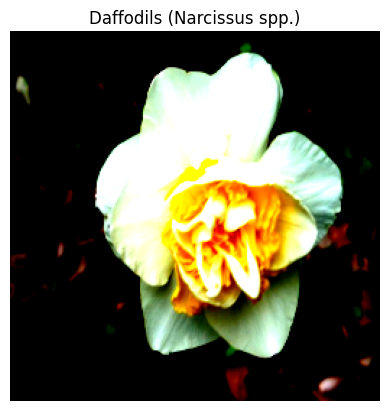

In [12]:
idx = np.random.randint(0, len(train_data))


## Es importante cambiar el orden de los canales para poder mostrar la imagen...
def plot_images(idx, data):
    plt.imshow(data[idx][0].permute(1, 2, 0))
    class_label = data[idx][1]
    plt.title(data.classes[class_label])
    plt.axis("off")


plot_images(idx, train_data)